# Clothing Classifier

## Import Libraries

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [3]:
tf.__version__

'2.9.1'

## Import Dataset

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Data Preprocessing

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

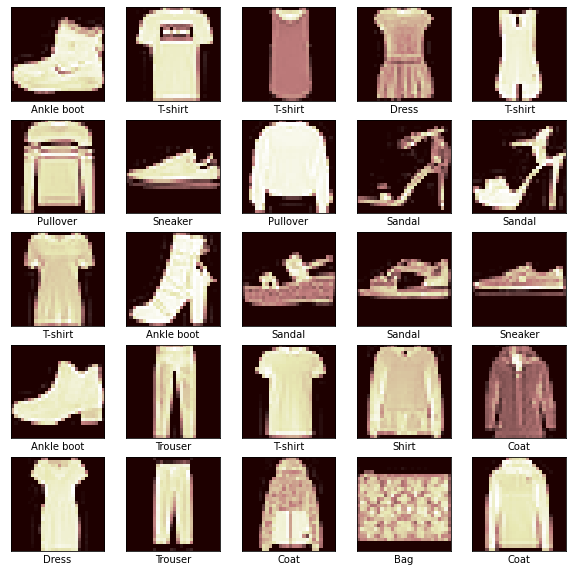

In [7]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    
    # remove standard grid markings
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.xlabel(class_names[y_train[i]])
    plt.imshow(X_train[i], cmap="pink")

## Build Model

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train[0].shape),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10)
])

In [9]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [10]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 1ms/step - loss: 0.5007 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3741 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3366 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3129 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2947 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2821 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2687 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2576 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2478 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.239

## Evaluate Model

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

In [12]:
loss, acc = history_dict["loss"], history_dict["accuracy"]
epochs = range(1, len(history_dict["loss"]) + 1)

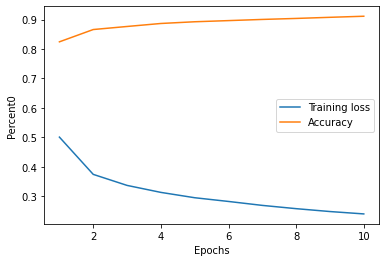

In [13]:
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, acc, label="Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Percent0")
plt.legend()
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"test_loss = {test_loss}")
print(f"test_acc = {test_acc}")

313/313 - 0s - loss: 0.3448 - accuracy: 0.8831 - 468ms/epoch - 1ms/step
test_loss = 0.3447851836681366
test_acc = 0.8830999732017517


## Make Predictions

In [15]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

Use probability model to make a single prediction

In [16]:
image = X_test[0]
prediction = probability_model(np.array([image])).numpy()[0]

In [17]:
print(f"prediction = {class_names[np.argmax(prediction)]}")
print(f"actual = {class_names[y_test[0]]}")

prediction = Ankle boot
actual = Ankle boot


In [18]:
def plot_image(i, prediction):
    image = X_test[i]
    label = class_names[np.argmax(prediction)]
    real_label = class_names[y_test[i]]
    color = "blue" if label == real_label else "red"

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(f"{label} ({100 * np.max(prediction):.2f}%) ({real_label})", color=color)
    plt.imshow(image, cmap="pink")

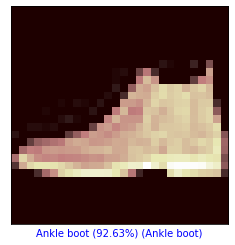

In [19]:
plot_image(0, prediction)

In [20]:
def plot_prediction(i, prediction):
    label, real_label = np.argmax(prediction), y_test[i]
    categories = range(len(class_names))

    plt.xticks(categories)
    plt.yticks([])
    plt.ylim([0, 1])

    hist = plt.bar(categories, np.array(prediction), color="#777777")
    hist[label].set_color("red")
    hist[real_label].set_color("blue")

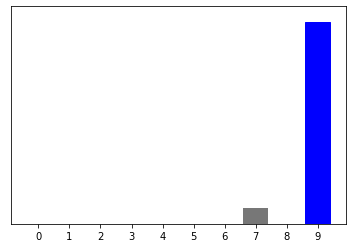

In [21]:
plot_prediction(0, prediction)

In [22]:
num_rows, num_cols = (5, 3)
num_images = num_rows * num_cols
predictions = probability_model(X_test[:num_images]).numpy()

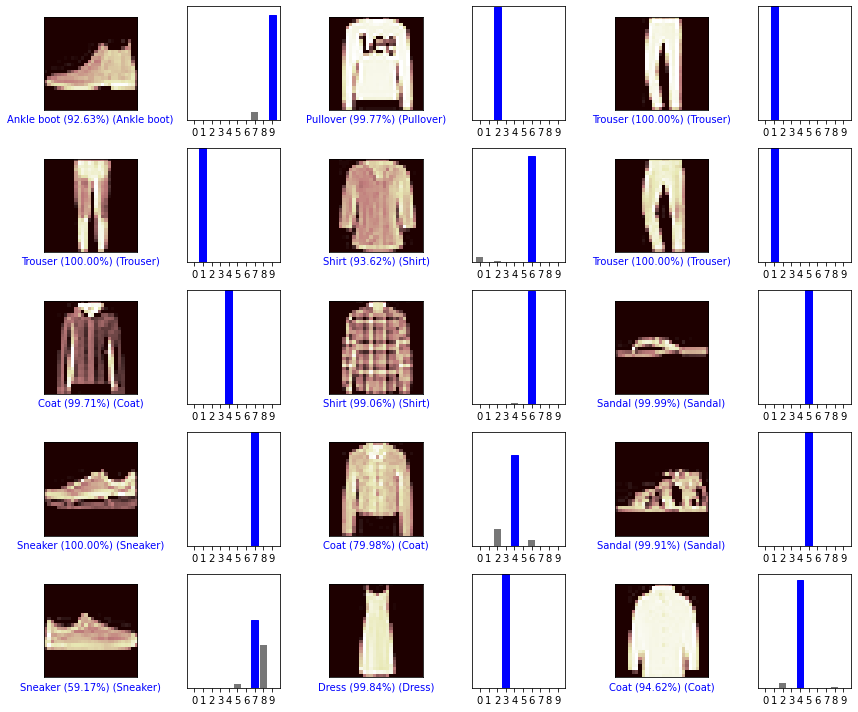

In [23]:

plt.figure(figsize=(num_cols * 2 * 2, num_rows * 2))
for i in range(num_images):
    prediction = predictions[i]
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, prediction)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_prediction(i, prediction)

plt.tight_layout()
plt.show()